In [1]:
import os #importing os library
import sys #importing sys library
import numpy as np #importing numpy library
import pandas as pd #importing pandas library
import matplotlib.pyplot as plt #importing matplotlib library
from sklearn.preprocessing import LabelEncoder #importing sklearn library
import seaborn #importing seaborn library

In [15]:
dataframe = pd.read_excel("data.xlsx") #creating our dataframe by reading our exel file
dataframe.columns#printing the columns of our dataframe

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
dataframe.type.value_counts()#printing the total value counts of all the columns

PAYMENT     47245
CASH_OUT    38092
CASH_IN     24645
TRANSFER    10370
DEBIT        1150
Name: type, dtype: int64

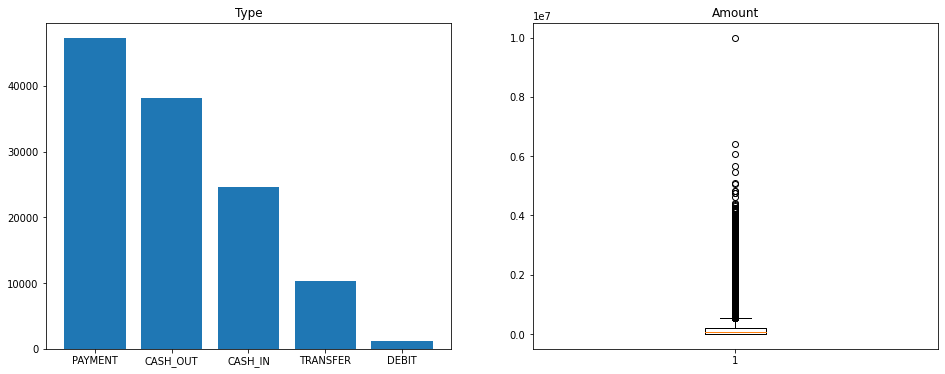

In [17]:
x=dataframe["type"].value_counts().index#creating the x dataframe from our dataset
y=dataframe["type"].value_counts().values#creating the y dataframe from our dataset

f = plt.figure(1,figsize=(16,6))#plotting a figure
ax1=f.add_subplot(1,2,1)#setting the parameters
ax1.title.set_text("Type")#setting the title of the dataset
_=ax1.bar(x,y)#creating the bar chart

z=dataframe["amount"].value_counts().index#creating the z dataframe from our dataset
ax2 = f.add_subplot(1,2,2)#setting the parameters
ax2.title.set_text("Amount")#setting the title of the dataset
_=ax2.boxplot(z)#creating the bar chart


In [18]:
df=dataframe.copy()#copying our dataframe into another variable

In [19]:
for col in df.columns: #here we are using the label encoder to fill the null values
    if df[col].dtype=="object": #checking if the column is 'Object'
        label_encoder = LabelEncoder() #creating a Label Encoder
        df[col].fillna("None",inplace=True) #filling null values with None
        label_encoder.fit(list(df[col].astype(str).values))#fiiting our dataset into the label encoder
        df[col]=label_encoder.transform(list(df[col].astype(str).values))
    else:
        df[col].fillna(-999,inplace=True) #else we are filling our column with -999

In [20]:
df.head(2)#printing our dataset again

step  type   amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3  9839.64     14382       170136.0       160296.36     37805   
1     1     3  1864.28     41684        21249.0        19384.72     39370   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0             0.0             0.0        0               0  
1             0.0             0.0        0               0

In [25]:
from pmdarima import auto_arima #importing our arima model from pmdarima
!pip install statsmodels #installing the statsmodel library



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
def isStationary(data, column='', maxval=0.05, series=False): #defining a function to check if our column is stationary or not
    if series: #if series
        test = statsmodels.tsa.stattools.adfuller(data, autolag='AIC')
    else:
        test = statsmodels.tsa.stattools.adfuller(data[column], autolag='AIC')
    p = test[1] 
    if p <= maxval:
        test = "It is Stationary" #if p <= maxval then column is stationary
    else:
        test = "It is Non-Stationary"#else then column is not stationary
    return test #here we are returning our result
isStationary(df, 'newbalanceOrig') #passing the dataframe into our function

'Stationary'

In [ ]:
arima = auto_arima(df['newbalanceOrig'], trace = True)
arima.summary()

In [43]:
processed_data = df #assigning our dataframe to preprocessed data

In [48]:
model_sarimax = statsmodels.api.tsa.statespace.SARIMAX(df['newbalanceOrig'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)#passing the parameters to our model SARIMAX
prediction = model_sarimax.fit() #fitting the model
print(prediction.summary().tables[1])#print our final result

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6914      0.029     23.525      0.000       0.634       0.749
ma.L1         -0.7501      0.027    -27.472      0.000      -0.804      -0.697
ar.S.L12      -0.0055      0.008     -0.664      0.507      -0.022       0.011
ma.S.L12      -0.9994      0.000  -4239.046      0.000      -1.000      -0.999
sigma2      7.301e+11   2.29e-12   3.19e+23      0.000     7.3e+11     7.3e+11
